# This notebook analyze the data for the wino(-) like LSP. The data satisfy the relic density with $\Omega h^2$. 

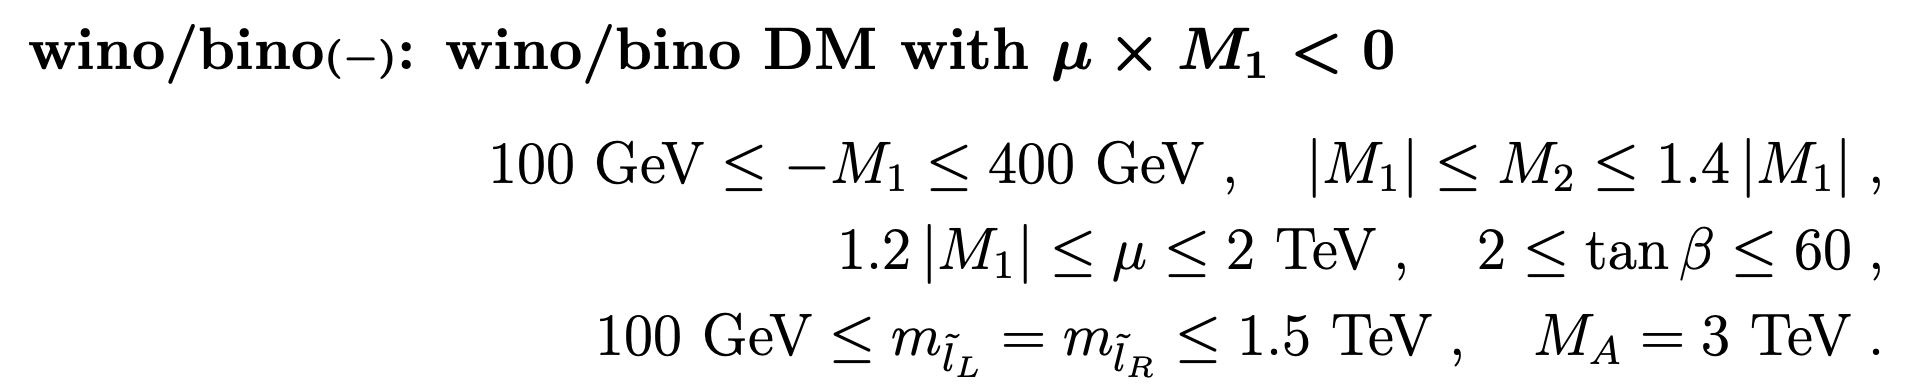

In [1]:
import os
import glob
from tqdm import tqdm
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#-------------------------------------------#
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm

In [2]:
data = np.load('/Users/hammad/work/DM/data/MSSM_out_wino_minus.npz',allow_pickle=True)['arr_0']

In [3]:
data.shape

(127737, 26)

In [4]:
m1= data[:,0];m2= data[:,1];mu= data[:,2];tan= data[:,3];m_chi1= data[:,4];m_chi2= data[:,5];m_chi3= data[:,6];
m_chi4= data[:,7];m_cha1= data[:,8];m_cha2= data[:,9];g_2= data[:,10];σ1= data[:,11];decay= data[:,12];Ω= data[:,13];
proton_dd= data[:,14];neutron_dd= data[:,15];ZNH= data[:,16];ZNW= data[:,17];ZNB= data[:,18];ZNH2= data[:,19];
ZNW2= data[:,20];ZNB2= data[:,21];br_chi= data[:,22];br_cha= data[:,23];dummy= data[:,24];HB= data[:,25];


In [6]:
coeff = 4*3.8937966e08/(np.pi)*pow((0.939*m_chi1)/(0.939+m_chi1),2)
DD = coeff*proton_dd**2

In [7]:
c0= HB ==1
c1 = Ω< 0.122
c2 = (Ω< 0.122) & (DD < 1e-10)
c3 = (Ω< 0.122) & (DD < 1e-10) & (HB ==1)
c4 = (Ω< 0.122) & (DD < 1e-10) & (HB ==1) & (σ1 > 0.6)
c5 = (Ω< 0.122) & (DD < 1e-10) & (g_2 <1e-10) & (σ1 > 0.6)

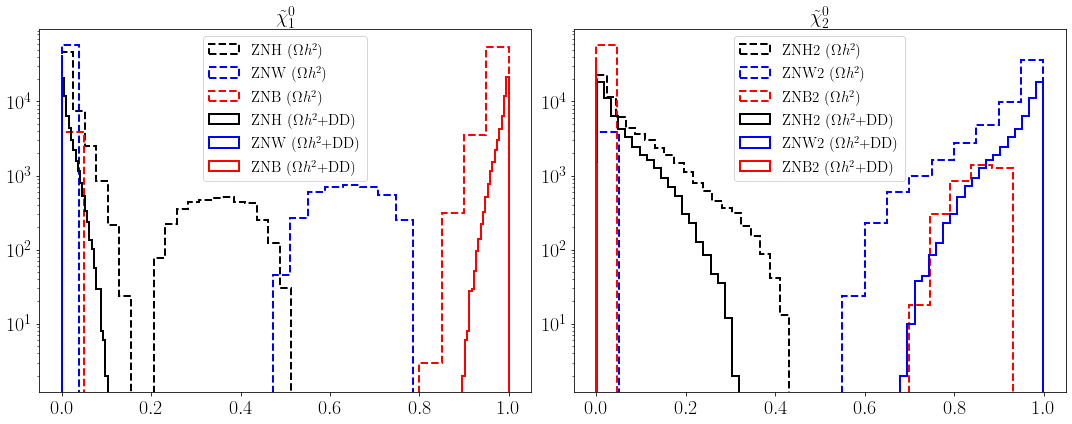

In [8]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.hist(ZNH[c1],bins=20,histtype='step',fill=False,label='ZNH ($\Omega h^2$)',linestyle='--',linewidth=2,color='k');
plt.hist(ZNW[c1],bins=20,histtype='step',fill=False,label='ZNW ($\Omega h^2$)',linestyle='--',linewidth=2,color='b');
plt.hist(ZNB[c1],bins=20,histtype='step',fill=False,label='ZNB ($\Omega h^2$)',linestyle='--',linewidth=2,color='r');


plt.hist(ZNH[c2],bins=20,histtype='step',fill=False,label='ZNH ($\Omega h^2$+DD)',linewidth=2,color='k');
plt.hist(ZNW[c2],bins=20,histtype='step',fill=False,label='ZNW ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='b');
plt.hist(ZNB[c2],bins=20,histtype='step',fill=False,label='ZNB ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='r');


plt.legend(fontsize=15);
plt.title(r'$\tilde{\chi}^0_1$',fontsize=20)
plt.tick_params('both',labelsize=20)
plt.yscale('log')

fig.add_subplot(122)
plt.hist(ZNH2[c1],bins=20,histtype='step',fill=False,label='ZNH2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='k');
plt.hist(ZNW2[c1],bins=20,histtype='step',fill=False,label='ZNW2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='b');
plt.hist(ZNB2[c1],bins=20,histtype='step',fill=False,label='ZNB2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='r');


plt.hist(ZNH2[c2],bins=20,histtype='step',fill=False,label='ZNH2 ($\Omega h^2$+DD)',linewidth=2,color='k');
plt.hist(ZNW2[c2],bins=20,histtype='step',fill=False,label='ZNW2 ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='b');
plt.hist(ZNB2[c2],bins=20,histtype='step',fill=False,label='ZNB2 ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='r');

plt.legend(fontsize=15);
plt.title(r'$\tilde{\chi}^0_2$',fontsize=20)
plt.tick_params('both',labelsize=20)
plt.yscale('log');
plt.tight_layout()

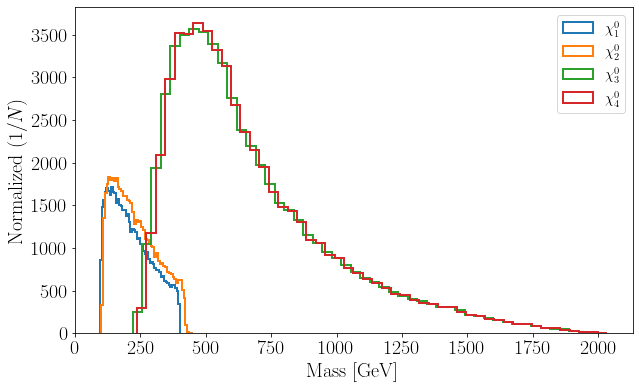

In [10]:
fig = plt.figure(figsize=(10,6))
plt.hist(m_chi1[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_1$',linewidth=2,density=False);
plt.hist(m_chi2[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_2$',linewidth=2,density=False);
plt.hist(m_chi3[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_3$',linewidth=2,density=False);
plt.hist(m_chi4[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_4$',linewidth=2,density=False);
plt.xlabel('Mass [GeV]',fontsize=20);
plt.ylabel('Normalized $(1/N)$',fontsize=20);
plt.tick_params('both', labelsize=20);
#plt.yscale('symlog');
plt.legend(fontsize=15);


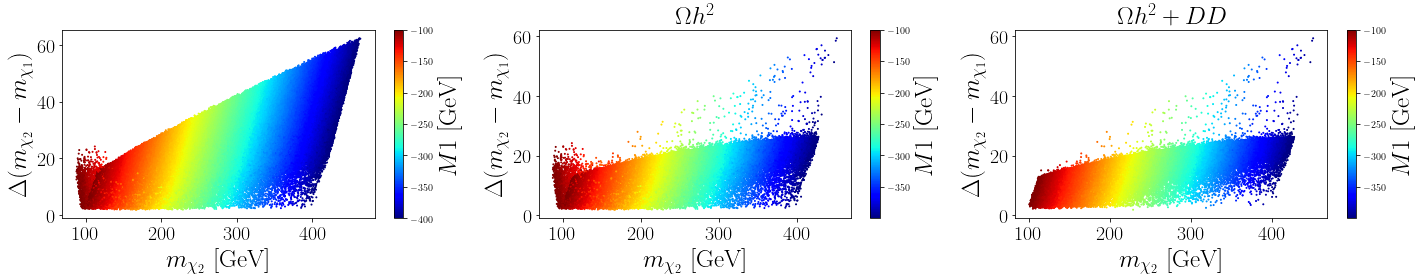

In [11]:
fig = plt.figure(figsize=(20,4))
fig.add_subplot(131)
plt.scatter(m_chi2,m_chi2-m_chi1,c=m1,s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);

#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);


fig.add_subplot(132)
plt.scatter(m_chi2[c1],m_chi2[c1]-m_chi1[c1],c=m1[c1],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);
plt.title(r'$\Omega h^2$',fontsize=25)
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);



fig.add_subplot(133)
plt.scatter(m_chi2[c2],m_chi2[c2]-m_chi1[c2],c=m1[c2],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);
plt.title(r'$\Omega h^2+DD$',fontsize=25)
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);
plt.tight_layout()

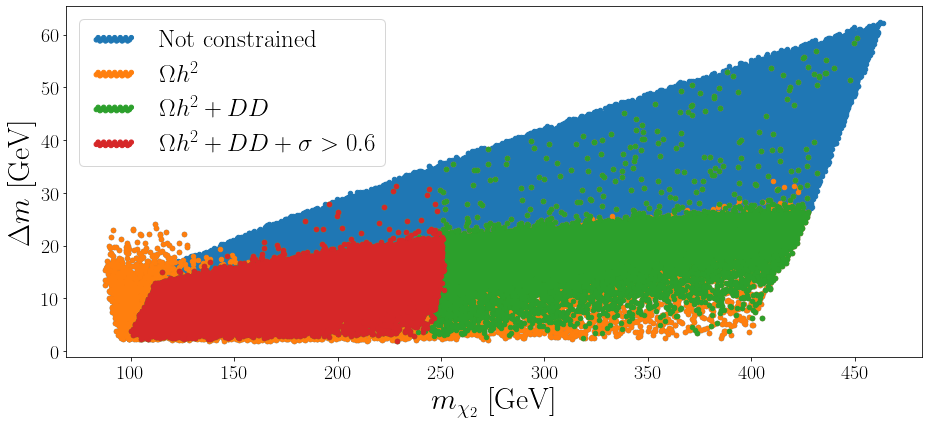

In [12]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2,m_chi2-m_chi1,s=20,label=r'Not constrained');
plt.scatter(m_chi2[c1],m_chi2[c1]-m_chi1[c1],s=20,label=r'$\Omega h^2$');
plt.scatter(m_chi2[c3],m_chi2[c3]-m_chi1[c3],s=20,label=r'$\Omega h^2+DD$');
plt.scatter(m_chi2[c4],m_chi2[c4]-m_chi1[c4],s=20,label=r'$\Omega h^2+DD+\sigma > 0.6$');
#plt.yscale('log');
plt.ylabel(r'$\Delta m$ [GeV]',fontsize=30);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=30);
plt.tick_params('both',labelsize=20);
plt.legend(fontsize=25,scatterpoints=20)
plt.tight_layout()

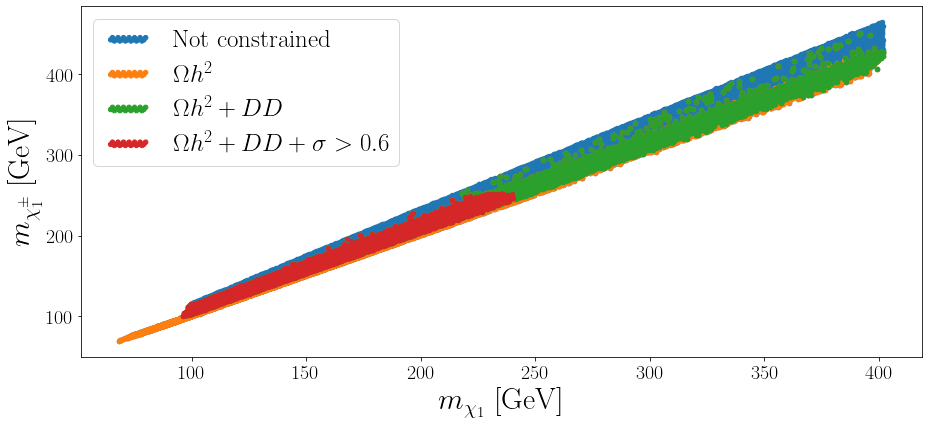

In [13]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi1,m_cha1,s=20,label=r'Not constrained');
plt.scatter(m_chi1[c1],m_cha1[c1],s=20,label=r'$\Omega h^2$');
plt.scatter(m_chi1[c3],m_cha1[c3],s=20,label=r'$\Omega h^2+DD$');
plt.scatter(m_chi1[c4],m_cha1[c4],s=20,label=r'$\Omega h^2+DD+\sigma > 0.6$');
#plt.yscale('log');
plt.ylabel(r'$m_{\chi^\pm_1}$ [GeV]',fontsize=30);
plt.xlabel(r'$m_{\chi_1}$ [GeV]',fontsize=30);
plt.tick_params('both',labelsize=20);
plt.legend(fontsize=25,scatterpoints=20)
plt.tight_layout()

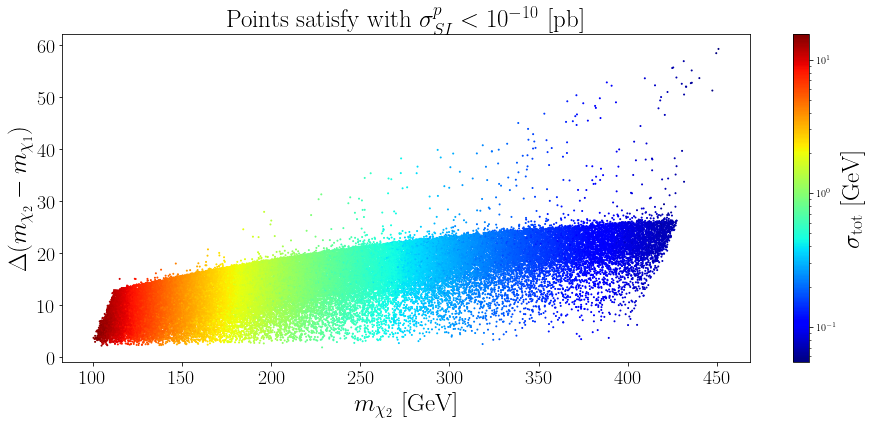

In [14]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2[c3],m_chi2[c3]-m_chi1[c3],c=σ1[c3],s=1,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm tot}$ [GeV]',fontsize=25);
plt.tight_layout()

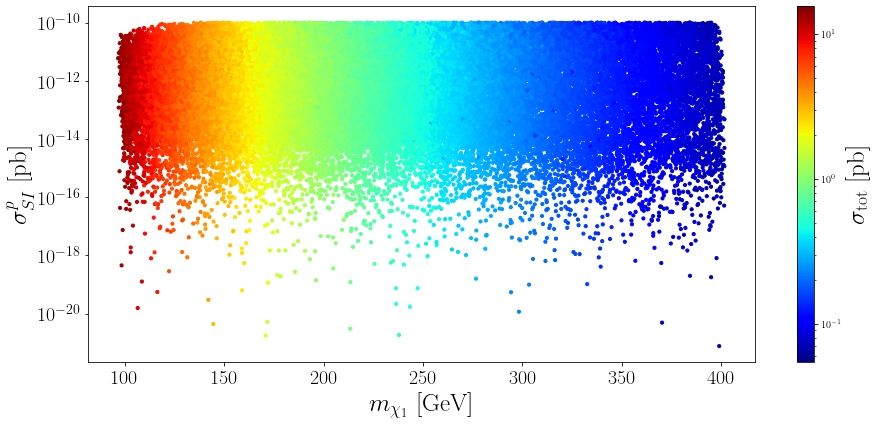

In [15]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi1[c3],DD[c3],c=σ1[c3],s=10,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma^p_{SI}$ [pb]',fontsize=25);
plt.xlabel(r'$m_{\chi_1}$ [GeV]',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm tot}$ [pb]',fontsize=25);
plt.tight_layout()

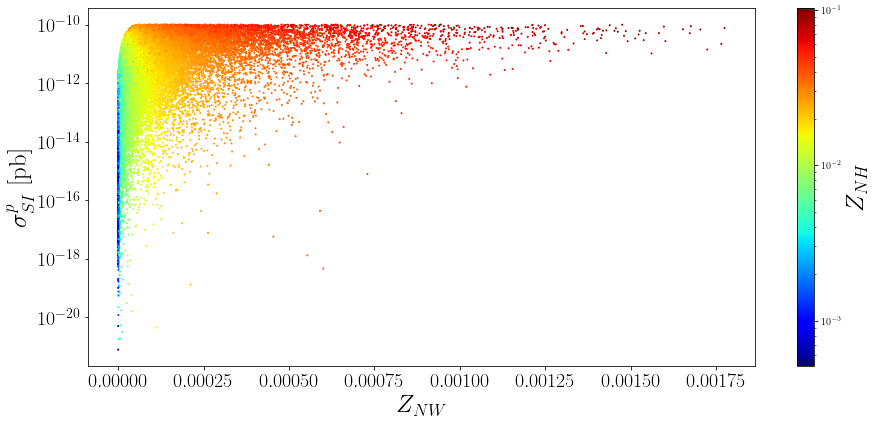

In [16]:
plt.figure(figsize=(13,6))
plt.scatter(ZNW[c3],DD[c3],c=ZNH[c3],s=1,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma^p_{SI}$ [pb]',fontsize=25);
plt.xlabel(r'$Z_{NW}$',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$Z_{NH}$',fontsize=25);
plt.tight_layout()

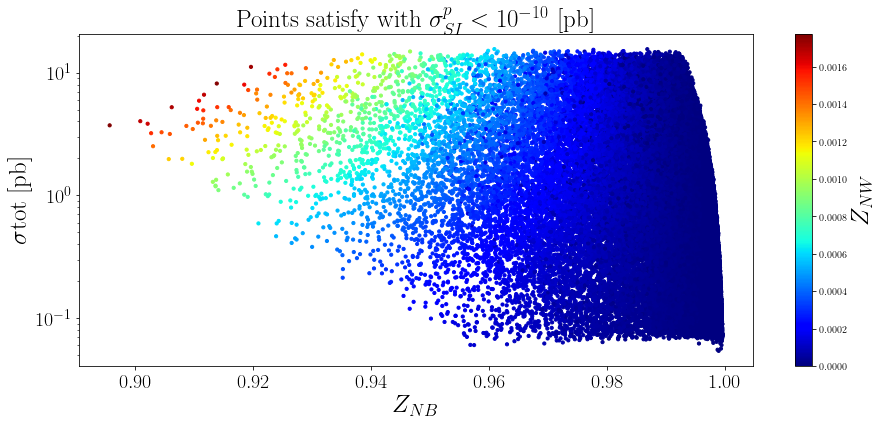

In [17]:
plt.figure(figsize=(13,6))
plt.scatter(ZNB[c3],σ1[c3],c=ZNW[c3],s=10,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma{\rm tot}$ [pb]',fontsize=25);
plt.xlabel(r'$Z_{NB}$',fontsize=25);
plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$Z_{NW}$',fontsize=25);
plt.tight_layout()

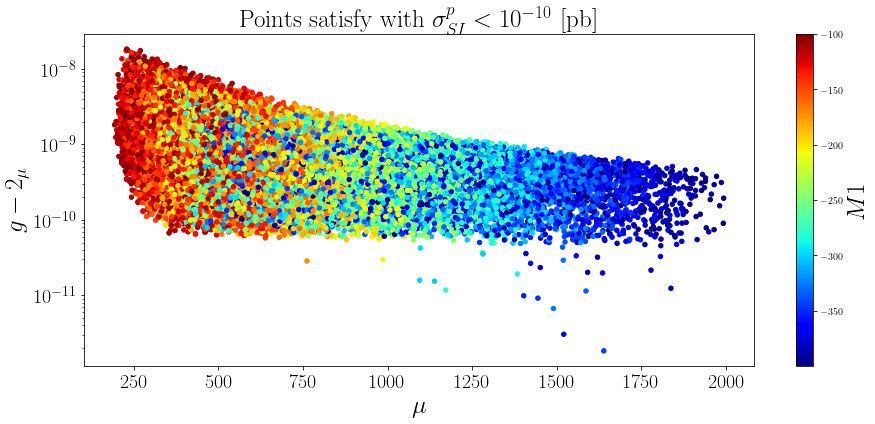

In [18]:
plt.figure(figsize=(13,6))
plt.scatter(mu[c3],g_2[c3],c=m1[c3],s=20,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$g-2_{\mu}$',fontsize=25);
plt.xlabel(r'$\mu$',fontsize=25);
plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$',fontsize=25);
plt.tight_layout()

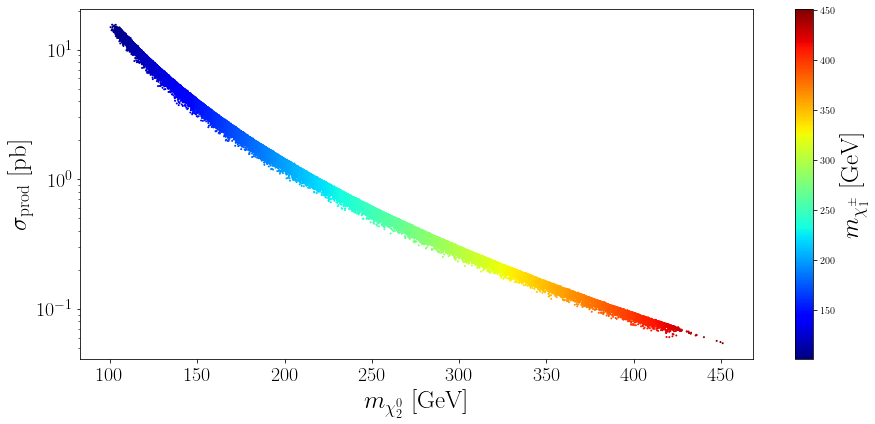

In [19]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2[c3],σ1[c3],c=m_cha1[c3],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma_{\rm prod}$ [pb]',fontsize=25);
plt.xlabel(r'$m_{\chi^0_2}$ [GeV]',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$m_{\chi^\pm_1}$ [GeV]',fontsize=25);
plt.tight_layout()

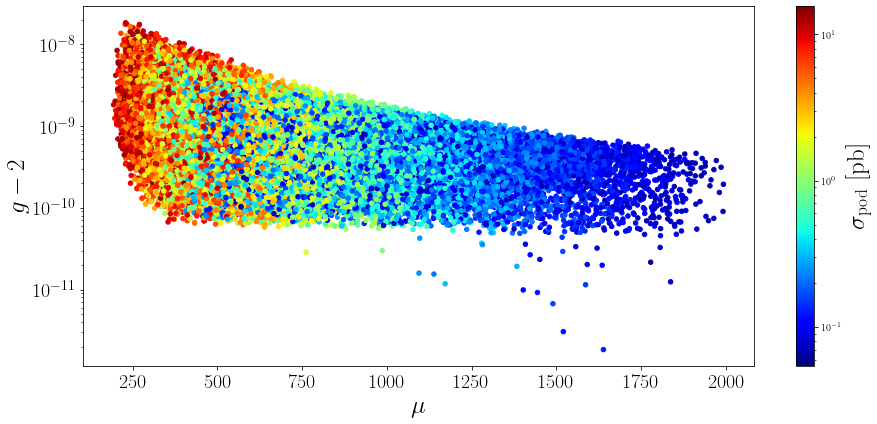

In [20]:
plt.figure(figsize=(13,6))
plt.scatter(mu[c3],g_2[c3],c=σ1[c3],s=20,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
#plt.xscale('log');
plt.xlabel(r'$\mu$',fontsize=25);
plt.ylabel(r'$g-2$',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm pod}$ [pb]',fontsize=25);
plt.tight_layout()

In [70]:
os.system('less /Users/hammad/work/DM/data/input_MSSM_wino_minus/SPheno.spc.MSSM13_1011')

# SUSY Les Houches Accord 2 - MSSM Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v4.0.3
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.6.0
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223
# Including the calculation of flavor observables based on the FlavorKit
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434
# Two-loop masss corrections to Higgs fields based on
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675
#   M. D. Goodsell, K. Ni

0

# BR(Su_5 -> Su_3 VZ )
     1.79046820E-11    2      2000002         23   # BR(Su_5 -> Su_4 VZ )
DECAY   2000006     2.46910515E+02   # Su_6
#    BR                NDA      ID1      ID2
     4.05238566E-11    2      1000002         36   # BR(Su_6 -> Su_1 Ah_2 )
     1.05603786E-08    2      1000004         36   # BR(Su_6 -> Su_2 Ah_2 )
     1.40433112E-11    2      1000006         36   # BR(Su_6 -> Su_3 Ah_2 )
     1.50271854E-05    2      2000002         36   # BR(Su_6 -> Su_4 Ah_2 )
     1.28741448E-10    2            2    1000022   # BR(Su_6 -> Fu_1 Chi_1 )
     3.55385571E-09    2            2    1000023   # BR(Su_6 -> Fu_1 Chi_2 )
     1.74429431E-12    2            2    1000025   # BR(Su_6 -> Fu_1 Chi_3 )
     1.00033644E-11    2            2    1000035   # BR(Su_6 -> Fu_1 Chi_4 )
     1.87938777E-08    2            4    1000022   # BR(Su_6 -> Fu_2 Chi_1 )
     5.18768961E-07    2            4    1000023   # BR(Su_6 -> Fu_2 Chi_2 )
     2.68691620E-10    2            4    1000025

     6.27138795E-02    2           -3    1000001   # BR(Glu -> Fd_2^* Sd_1 )
     3.03305480E-09    2            3   -1000003   # BR(Glu -> Fd_2 Sd_2^* )
     3.03305480E-09    2           -3    1000003   # BR(Glu -> Fd_2^* Sd_2 )
     2.31681450E-04    2            3   -1000005   # BR(Glu -> Fd_2 Sd_3^* )
     2.31681450E-04    2           -3    1000005   # BR(Glu -> Fd_2^* Sd_3 )
     6.18376823E-02    2            3   -2000001   # BR(Glu -> Fd_2 Sd_4^* )
     6.18376823E-02    2           -3    2000001   # BR(Glu -> Fd_2^* Sd_4 )
     1.49165570E-09    2            5   -1000001   # BR(Glu -> Fd_3 Sd_1^* )
     1.49165570E-09    2           -5    1000001   # BR(Glu -> Fd_3^* Sd_1 )
     9.88038481E-14    2            5   -1000003   # BR(Glu -> Fd_3 Sd_2^* )
     9.88038481E-14    2           -5    1000003   # BR(Glu -> Fd_3^* Sd_2 )
     2.93666953E-10    2            5   -1000005   # BR(Glu -> Fd_3 Sd_3^* )
     2.93666953E-10    2           -5    1000005   # BR(Glu -> Fd_3^* Sd_3 )